<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/eda_cluster_2_analise_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os produtos mais caros

Neste notebook, será feito a análise do produtos pertencentes a faixa de preço acima de 484 dólares, ou seja , pertecentes ao cluster 2 feita anteriormente

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
mercari = pd.read_csv('/content/drive/MyDrive/Datasets/mercari_com_cluster_texto.csv')
mercari.drop('Unnamed: 0',axis=1,inplace=True)
mercari.head()

name   category_1  \
0              iphone 6s plus defender case  Electronics   
1    beautiful rainbow eye iphone plus case  Electronics   
2  hold under armour women s t shirt bundle        Women   
3                        nike shorts bundle        Women   
4               bare mineral eye shadow lot       Beauty   

                  category_2             category_3  item_condition_id  \
0  Cell Phones & Accessories  Cases, Covers & Skins                  1   
1  Cell Phones & Accessories  Cases, Covers & Skins                  1   
2           Athletic Apparel          Shirts & Tops                  2   
3           Athletic Apparel                 Shorts                  3   
4                     Makeup                   Eyes                  3   

     brand_name  price  shipping  \
0      No Brand   10.0         1   
1      No Brand    7.0         1   
2  Under Armour   20.0         1   
3          Nike   18.0         1   
4      No Brand   14.0         0   

                                    item_description        date  stock  \
0  protective case for the big iphones 6plus or 6...   15-6-2018      2   
1  this soft case is brand new and features a bea...  12-12-2018      1   
2  women s under armour t shirts with freedom log...   13-5-2018     11   
3                                 no description yet   24-2-2018      4   
4  bare mineral eye shadow verity of colors bare ...  29-10-2018     11   

   cluster  cluster_texto  
0        0              3  
1        0              3  
2        0              1  
3        0              0  
4        0              3

Agora será filtado apenas aos que pertencem ao cluster 2 do atributo cluster.

In [ ]:
mercari_2 = mercari[mercari['cluster']==2]
mercari_2.drop(['date','stock','cluster_texto'],
               axis=1,inplace=True)
mercari_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


name   category_1           category_2  \
107         authentic neverfull damier mm        Women     Women's Handbags   
1048          macbook pro retina like new  Electronics  Computers & Tablets   
1820                   chanel card holder        Women  Women's Accessories   
3503                 lv neverfull reserve        Women     Women's Handbags   
4925  louis vuitton neverfull gm monogram        Women     Women's Handbags   

              category_3  item_condition_id     brand_name   price  shipping  \
107     Totes & Shoppers                  3  Louis Vuitton   806.0         0   
1048  Laptops & Netbooks                  2          Apple   649.0         1   
1820             Wallets                  1         Chanel   520.0         1   
3503        Shoulder Bag                  3  Louis Vuitton   679.0         0   
4925        Shoulder Bag                  3  Louis Vuitton  1009.0         0   

                                       item_description  cluster  
107   this is guarantee authentic pre owned neverful...        2  
1048  apple inch macbook pro with retina late model ...        2  
1820  never used price firm just asking for the pric...        2  
3503  date code sd3126 interior and exterior is grea...        2  
4925  comes with dust bag and receipt does not inclu...        2

In [ ]:
mercari_2.shape

(868, 10)

In [ ]:
mercari_2['category_1'].value_counts(ascending=True)

Sports & Outdoors           3
No category                 3
Home                        4
Handmade                    7
Kids                        7
Other                      17
Beauty                     18
Men                        40
Vintage & Collectibles     91
Electronics               281
Women                     397
Name: category_1, dtype: int64

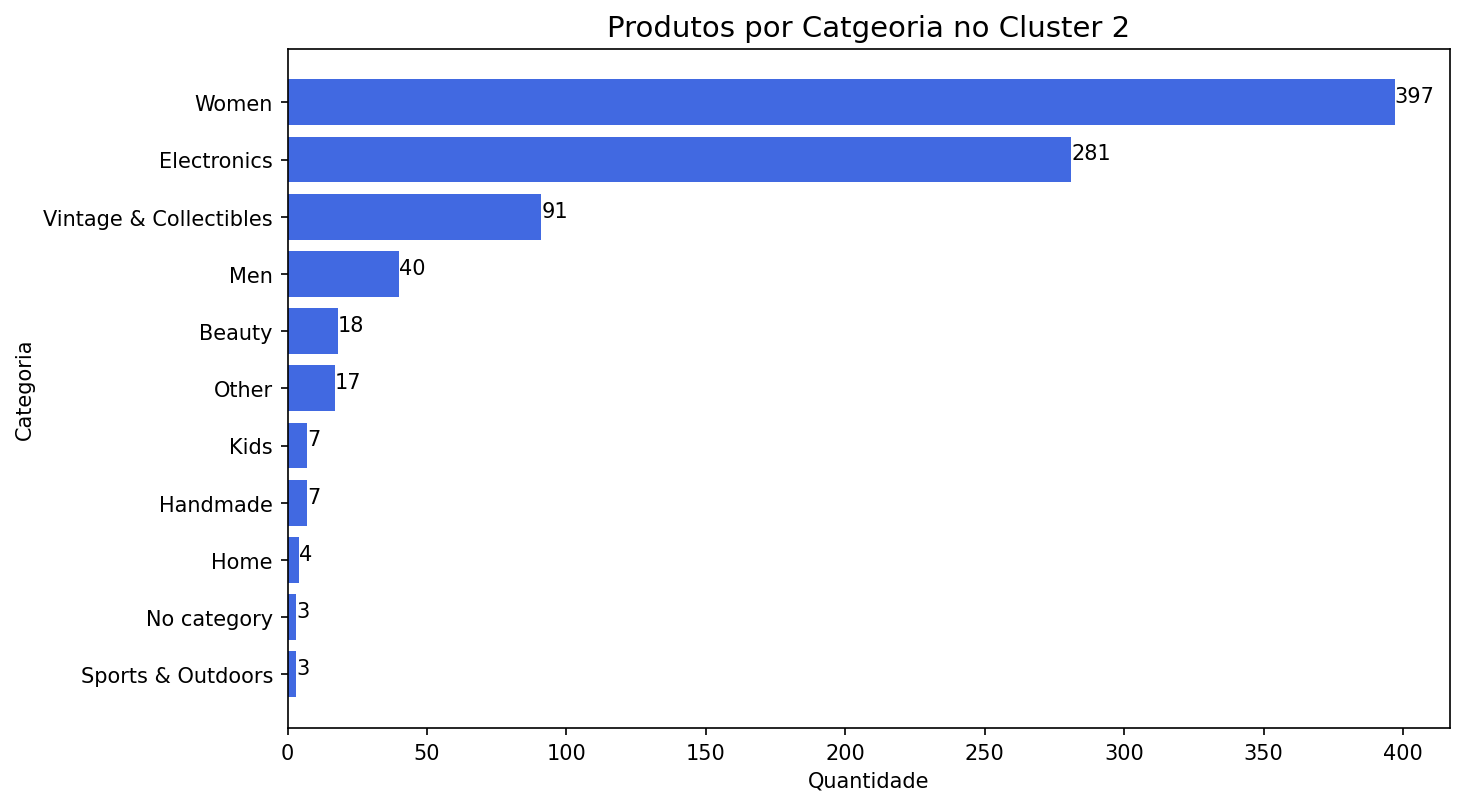

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Produtos por Catgeoria no Cluster 2',fontsize=14)
plt.barh(mercari_2['category_1'].value_counts(ascending=True).index,
         mercari_2['category_1'].value_counts(ascending=True),color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')

# Colocando os números nas barras
for index, value in enumerate(mercari_2['category_1'].value_counts(ascending=True)):
  plt.text(value, index, str(value))

In [ ]:
px.histogram(mercari[mercari['cluster']==2],x='price',marginal="box",
             title='Distribuição de Preço dos Produtos do Cluster 2',
             labels={'price':'Preço (em dolar)','count':'Quantidade'})

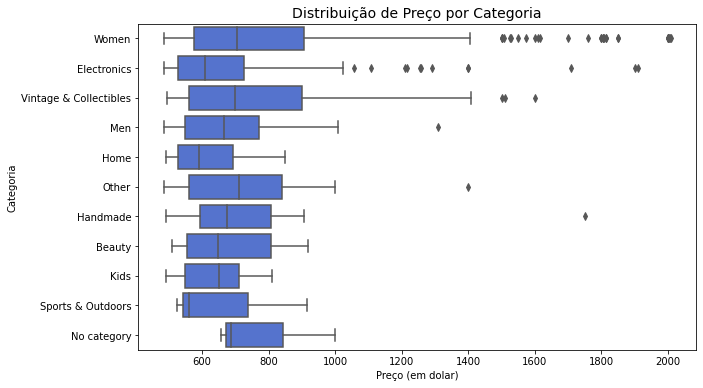

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Distribuição de Preço por Categoria',fontsize=14)
sns.boxplot(y='category_1',x='price',data=mercari_2,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('Categoria');

In [ ]:
mercari_2['brand_name'].value_counts()[0:20]

Louis Vuitton          239
Apple                  198
No Brand               136
Chanel                  37
Adidas                  18
David Yurman            14
Gucci                   13
Canon                   13
Saint Laurent            9
Christian Louboutin      9
Microsoft                8
MCM Worldwide            8
Burberry                 8
Valentino                7
MICHELE                  7
Samsung                  7
Kendra Scott             6
Victoria's Secret        6
Prada                    6
Celine                   5
Name: brand_name, dtype: int64

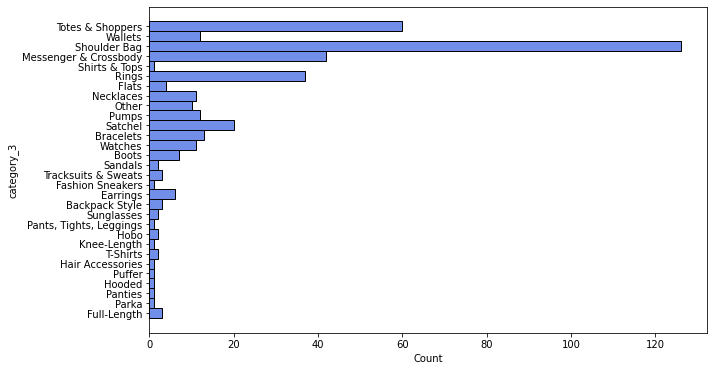

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(y='category_3',data=mercari_2[mercari_2['category_1']=='Women'],color='royalblue')

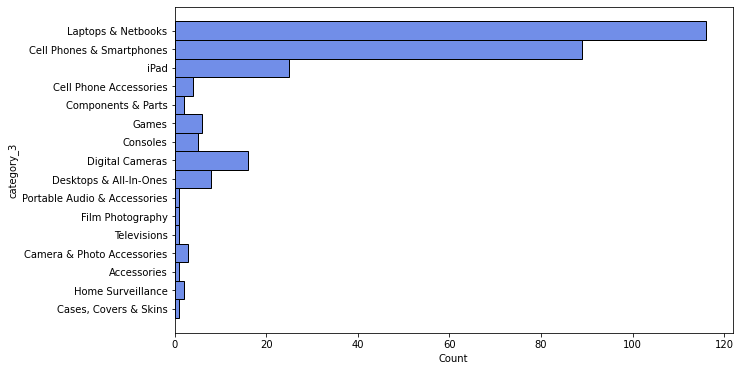

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(y='category_3',data=mercari_2[mercari_2['category_1']=='Electronics'],color='royalblue')

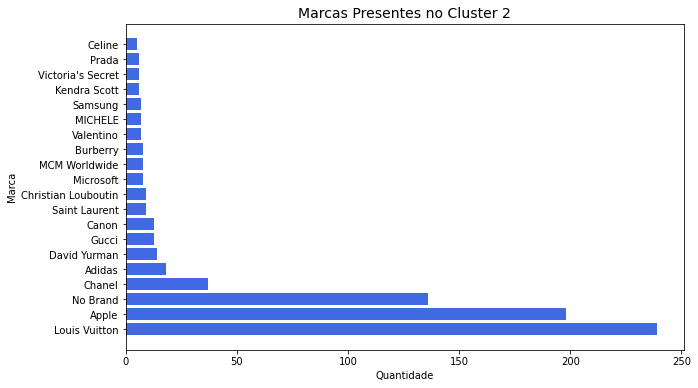

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Marcas Presentes no Cluster 2',fontsize=14)
plt.barh(mercari_2['brand_name'].value_counts().index[0:20],
         mercari_2['brand_name'].value_counts()[0:20],color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Marca');

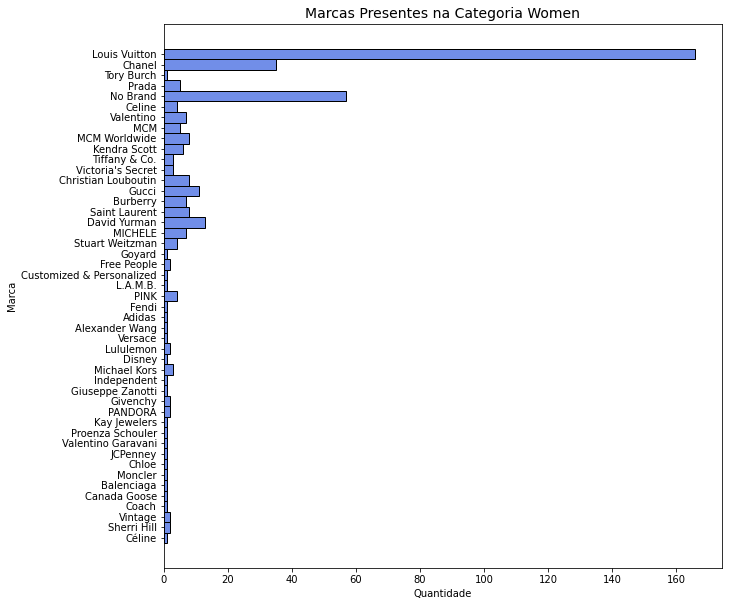

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Marcas Presentes na Categoria Women',fontsize=14)
sns.histplot(y='brand_name',data=mercari_2[mercari_2['category_1']=='Women'],color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Marca');

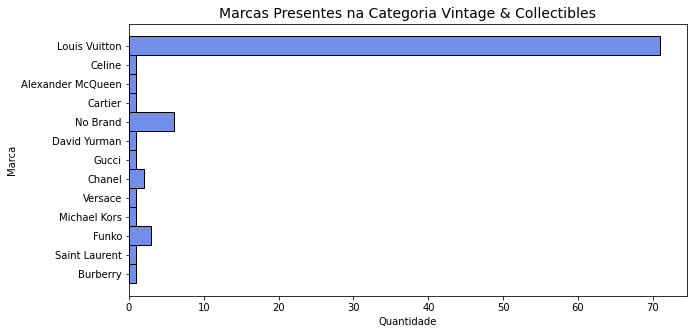

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Marcas Presentes na Categoria Vintage & Collectibles',fontsize=14)
sns.histplot(y='brand_name',data=mercari_2[mercari_2['category_1']=='Vintage & Collectibles'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Marca');

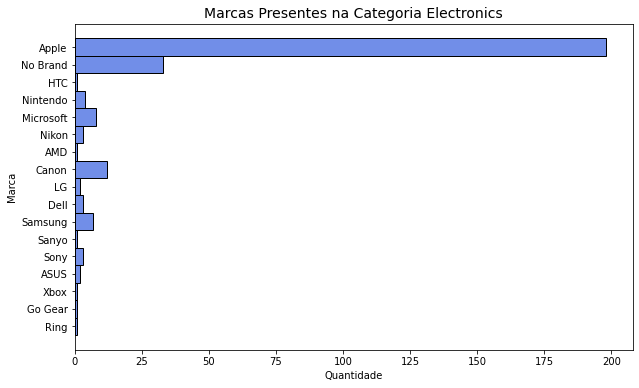

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Marcas Presentes na Categoria Electronics',fontsize=14)
sns.histplot(y='brand_name',data=mercari_2[mercari_2['category_1']=='Electronics'],
             color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Marca');

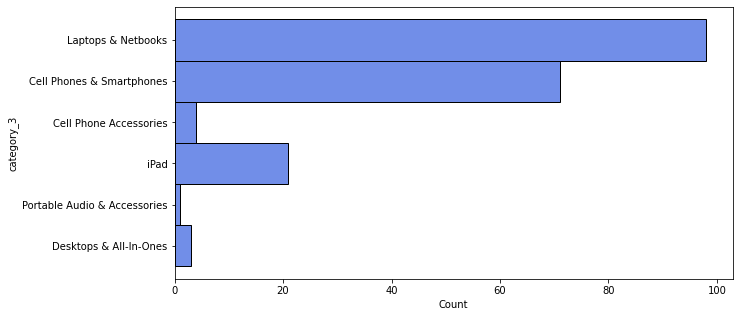

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y='category_3',data=mercari_2[mercari_2['brand_name']=='Apple'],
             color='royalblue')

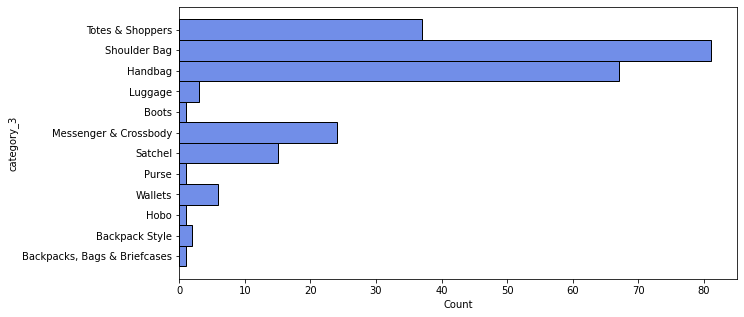

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y='category_3',data=mercari_2[mercari_2['brand_name']=='Louis Vuitton'],
             color='royalblue')

In [ ]:
mercari_2[mercari_2['category_1']=='Sports & Outdoors']


name         category_1 category_2  \
237589  naish alanna with bar and bag  Sports & Outdoors   Outdoors   
437365        nfl dogs for stacy only  Sports & Outdoors   Fan Shop   
870075                   titleist ap1  Sports & Outdoors       Golf   

              category_3  item_condition_id brand_name  price  shipping  \
237589      Water Sports                  2   No Brand  915.0         0   
437365               NFL                  1   No Brand  559.0         0   
870075  Men's Golf Clubs                  1   Titleist  525.0         1   

                                         item_description  cluster  
237589  size 10m includes naish user manual and repair...        2  
437365                                                euc        2  
870075  brand new still in the wrapper titleist ap1 ir...        2

In [ ]:
mercari_2[mercari_2['category_1']=='No category']

name   category_1   category_2  \
452690                         inr plus strips  No category  No category   
483587  canon eos rebel t6i perfect vlog setup  No category  No category   
585169                             inr machine  No category  No category   

         category_3  item_condition_id brand_name   price  shipping  \
452690  No category                  1   No Brand  1000.0         1   
483587  No category                  2      Canon   656.0         0   
585169  No category                  1   No Brand   686.0         0   

                                         item_description  cluster  
452690  this post is good for brand new machines box o...        2  
483587  selling like new canon eos t6i it is in mint c...        2  
585169  brand new in box comes with what is show in pi...        2

In [ ]:
mercari_2[mercari_2['category_1']=='Home']

name category_1        category_2  \
43515             rae dunn starter set       Home  Kitchen & Dining   
202241                 vitamix blender       Home   Home Appliances   
681285         nike signed by mj touch       Home        Home Décor   
747708  rae dunn teapot pitcher sweets       Home  Kitchen & Dining   

                      category_3  item_condition_id brand_name  price  \
43515   Coffee & Tea Accessories                  2   Rae Dunn  490.0   
202241        Kitchen Appliances                  1    Vitamix  640.0   
681285        Home Décor Accents                  2    Demdaco  848.0   
747708  Coffee & Tea Accessories                  2   No Brand  540.0   

        shipping                                   item_description  cluster  
43515          0  brand new rae dunn starter set cookies coffee ...        2  
202241         1  brand new sealed ratings or order will be canc...        2  
681285         0                                 no description yet        2  
747708         0  this listing is for two items rae dunn boutiqu...        2

In [ ]:
mercari_2[mercari_2['category_1']=='Kids']

name category_1  \
161069                     hold for kat funo pop       Kids   
239446  orbit baby double stroller kit brand new       Kids   
244992                     prada vela diaper bag       Kids   
525036            britax b ready double stroller       Kids   
591059                    reborn doll kit bundle       Kids   
677466          hatchimals blue purple pink teal       Kids   
714055         new in box orbit toddler car seat       Kids   

                     category_2                category_3  item_condition_id  \
161069                     Toys  Action Figures & Statues                  1   
239446                Strollers            Travel Systems                  1   
244992                Diapering               Diaper Bags                  1   
525036                Strollers            Travel Systems                  1   
591059                     Toys       Dolls & Accessories                  1   
677466                     Toys   Stuffed Animals & Plush                  1   
714055  Car Seats & Accessories                 Car Seats                  1   

         brand_name  price  shipping  \
161069        Funko  656.0         0   
239446   Orbit Baby  525.0         0   
244992     No Brand  809.0         0   
525036       Britax  490.0         0   
591059     No Brand  572.0         0   
677466  Spin Master  765.0         0   
714055   Orbit Baby  650.0         1   

                                         item_description  cluster  
161069                                               hold        2  
239446  new see pictures this is g3 for g3 orbit baby ...        2  
244992  prada diaper bag and accessories brand new fro...        2  
525036           brand new in box comes with the 2nd seat        2  
591059  shyann x morgan x sweat pea raine kyra molly m...        2  
677466  brand new in hand ready to ship i ship same da...        2  
714055                                 no description yet        2

In [ ]:
mercari_2[mercari_2['category_1']=='Handmade']

name category_1       category_2  \
93862                     ship vs ii iilovez   Handmade         Clothing   
149749    freedom couture authentic wig unit   Handmade      Accessories   
233384                    macbook pro laptop   Handmade  Bags and Purses   
248002                 chanel purse reserved   Handmade  Bags and Purses   
366281  ysl saint laurent leather clutch bag   Handmade  Bags and Purses   
440449                   silver chanel purse   Handmade  Bags and Purses   
707473         laptop apple macbook pro inch   Handmade  Bags and Purses   

       category_3  item_condition_id brand_name   price  shipping  \
93862    Lingerie                  1   No Brand   580.0         1   
149749       Hair                  1   No Brand   906.0         0   
233384     Laptop                  2   No Brand   609.0         0   
248002      Purse                  3   No Brand  1750.0         1   
366281     Clutch                  2   No Brand   675.0         1   
440449      Purse                  3   No Brand   706.0         0   
707473     Laptop                  3   No Brand   490.0         1   

                                         item_description  cluster  
93862                                    nwt 9x bombshell        2  
149749  original price 400usd authentic brand new with...        2  
233384  model md102ll a totally cleared reset to facto...        2  
248002                                       chanel purse        2  
366281  price is firm and no trades yves saint laurent...        2  
440449  includes everything pictured and dust bag i be...        2  
707473  no issues with it just extra need to sell has ...        2

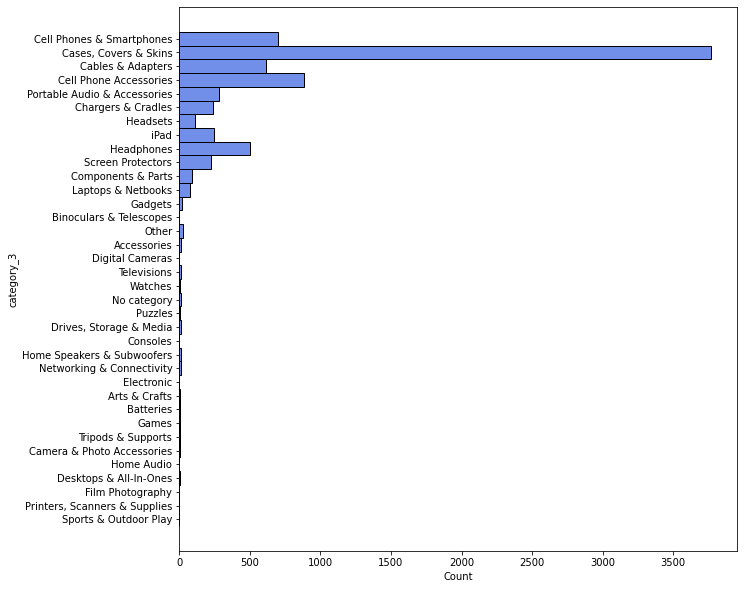

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(y='category_3',data=mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==0)],
             color='royalblue')

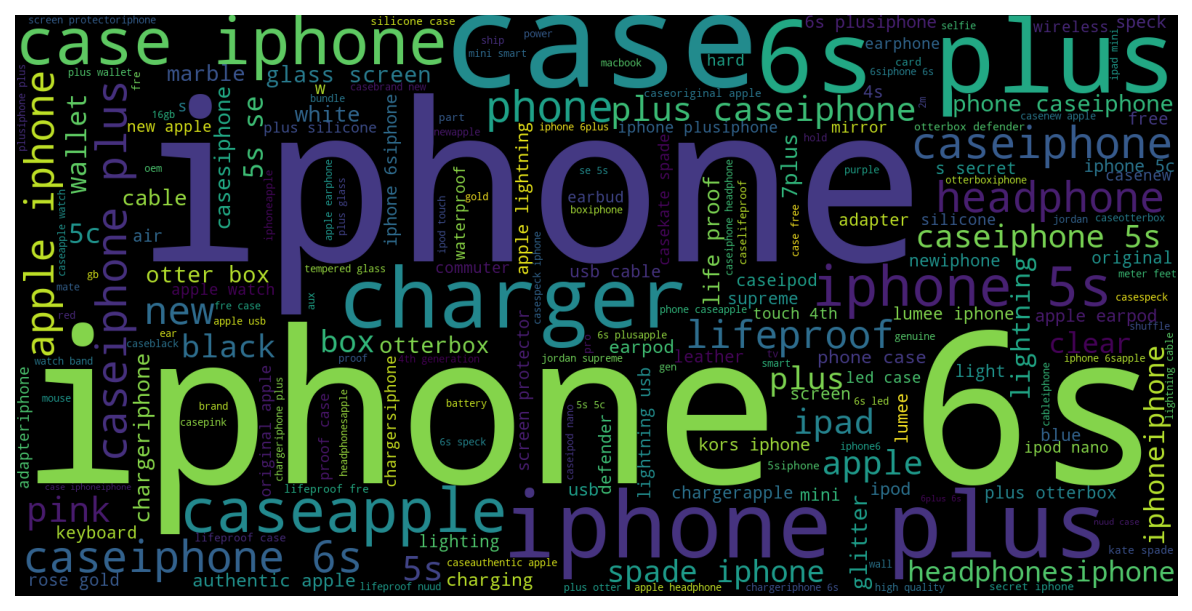

In [ ]:
apple_0 = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==0)]['name'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_0)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

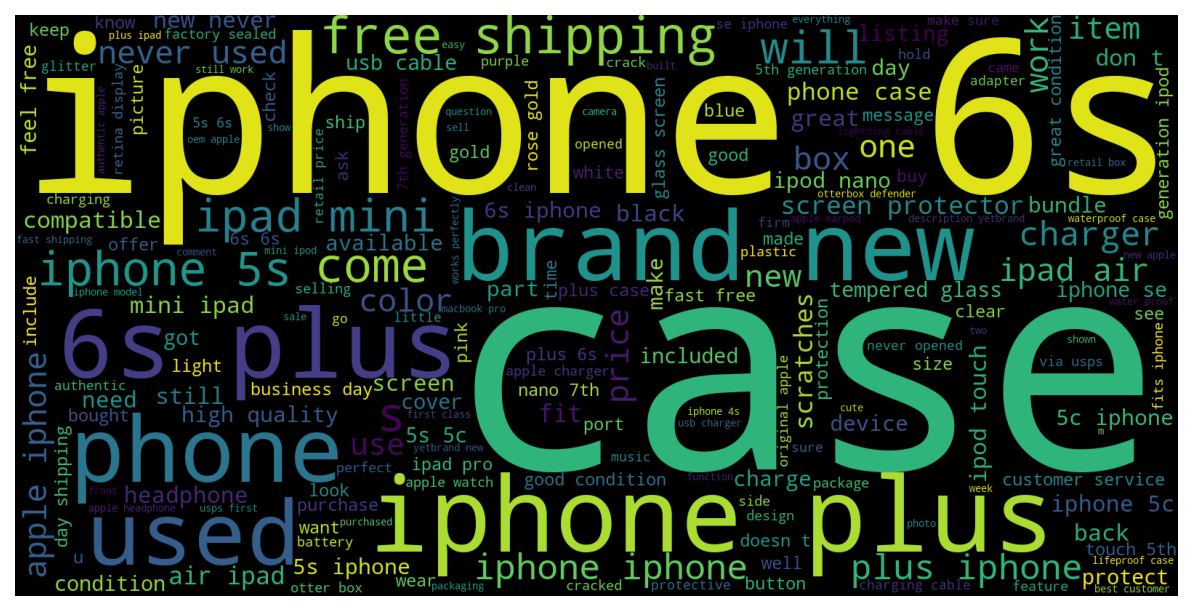

In [ ]:
apple_0_des = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==0)]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_0_des)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

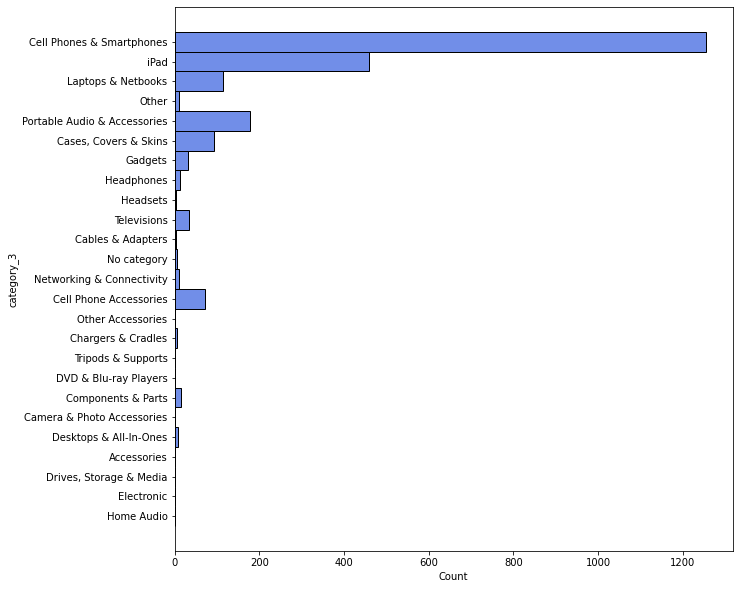

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(y='category_3',data=mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==1)],
             color='royalblue')

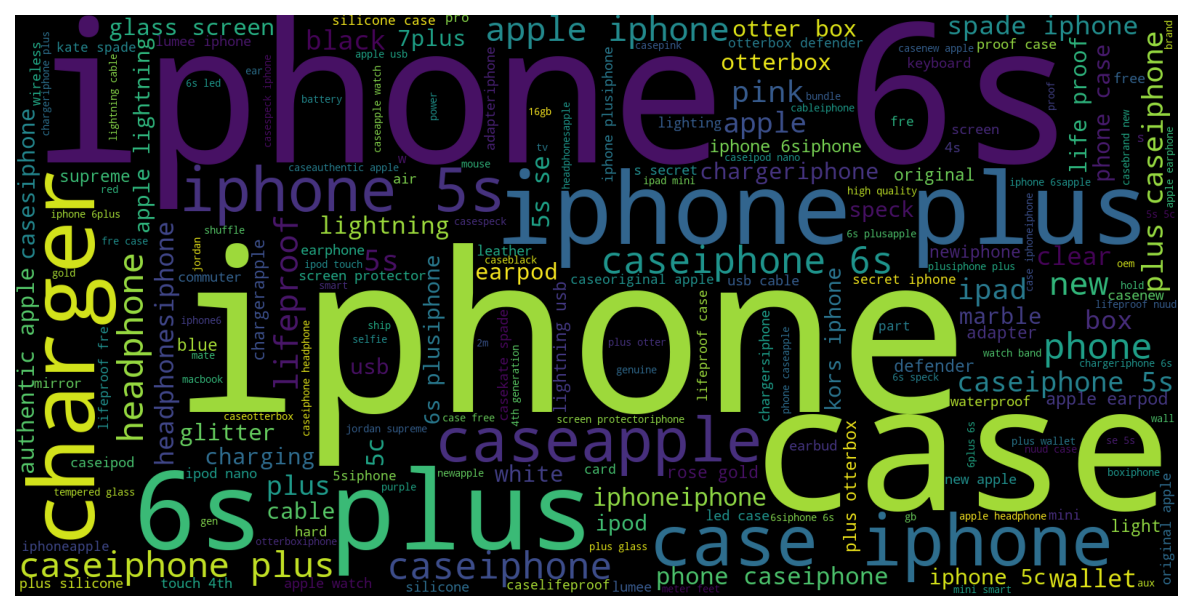

In [ ]:
apple_1 = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==1)]['name'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_0)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

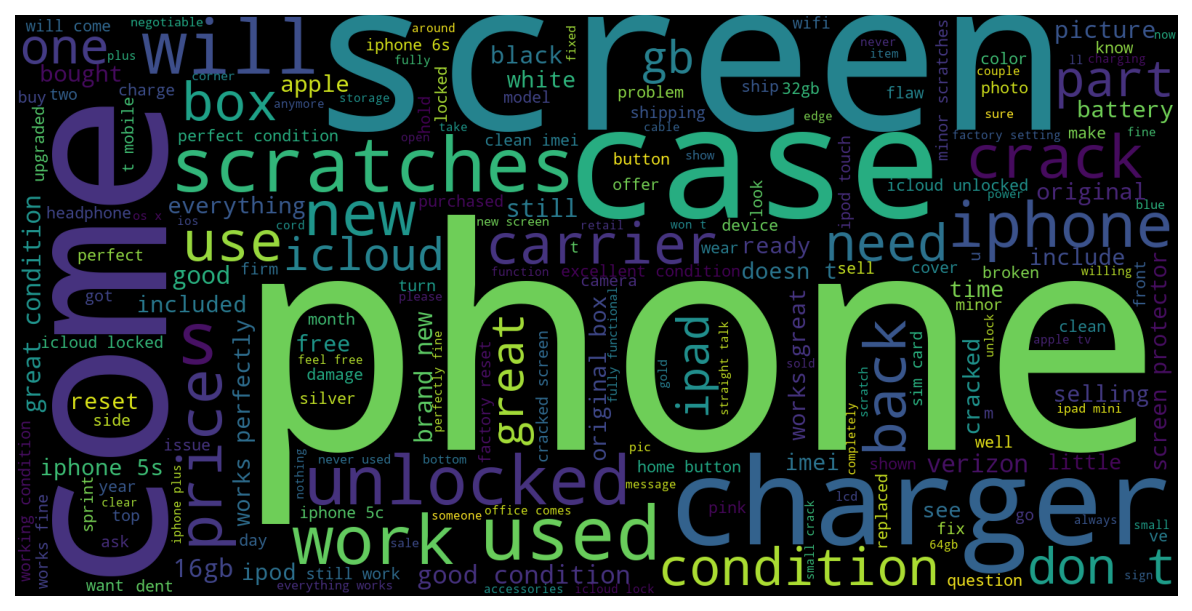

In [ ]:
apple_1_des = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==1)]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_1_des)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

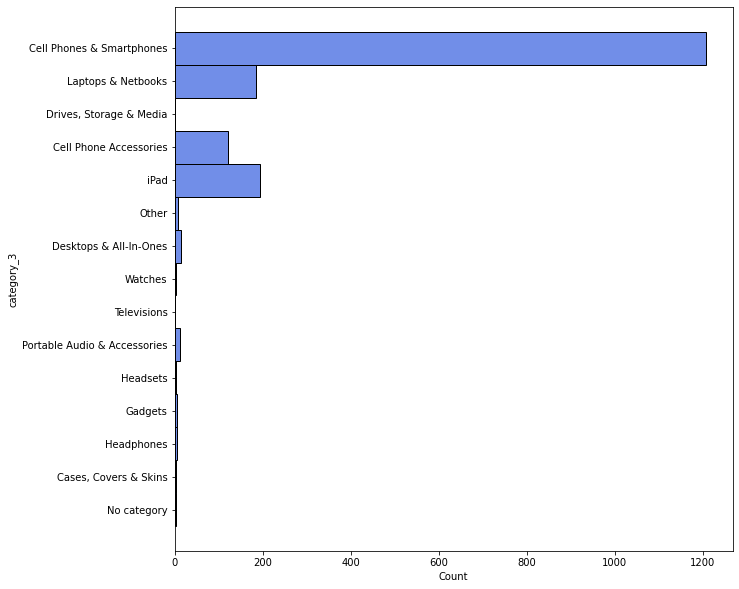

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(y='category_3',data=mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==3)],
             color='royalblue')

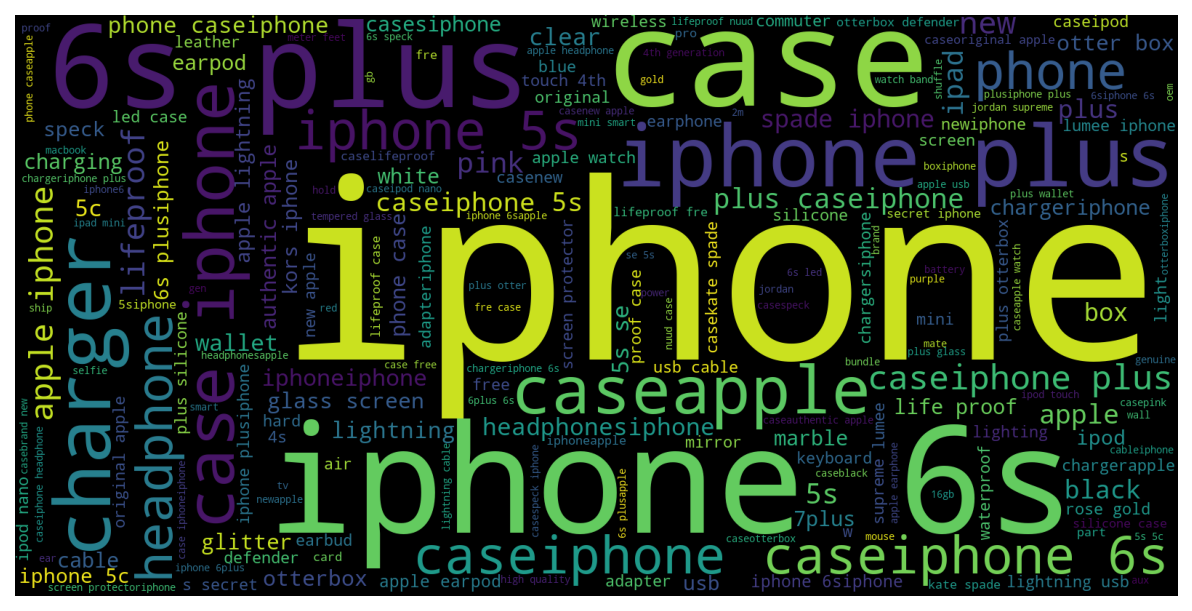

In [ ]:
apple_3 = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==3)]['name'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_3)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

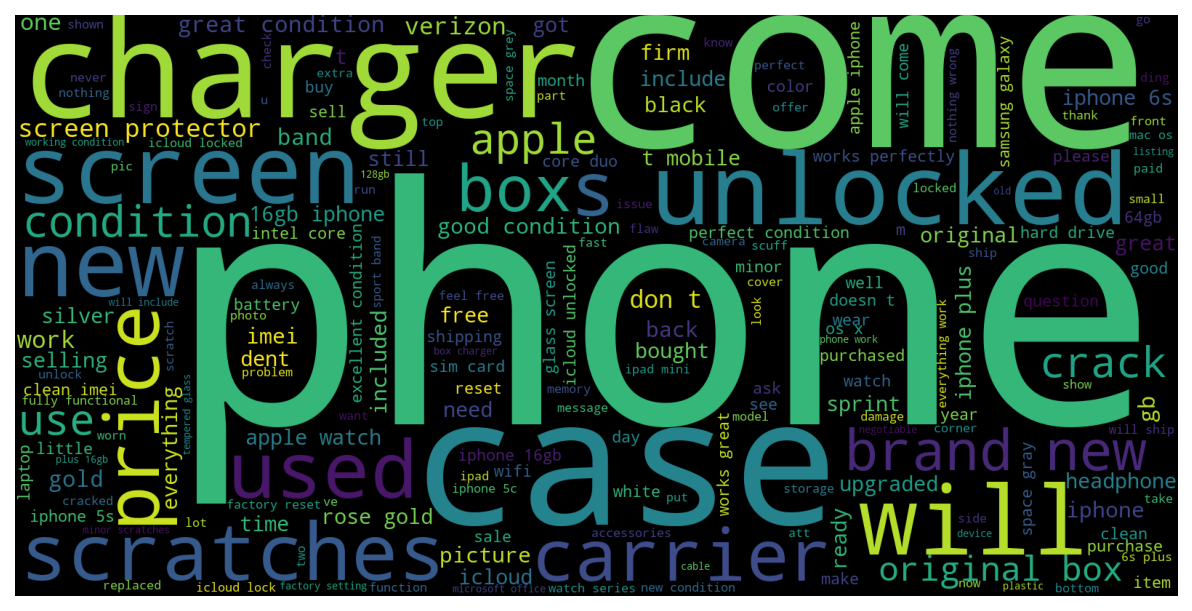

In [ ]:
apple_3_des = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==3)]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_3_des)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

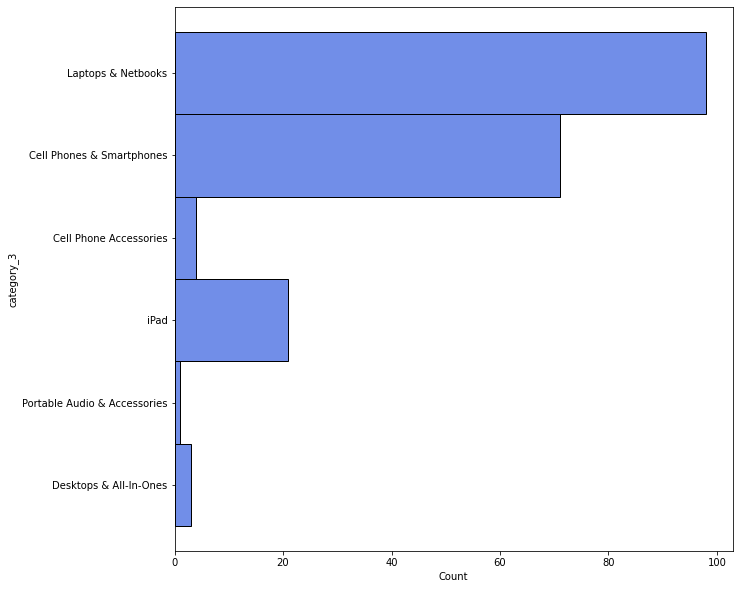

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(y='category_3',data=mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==2)],
             color='royalblue')

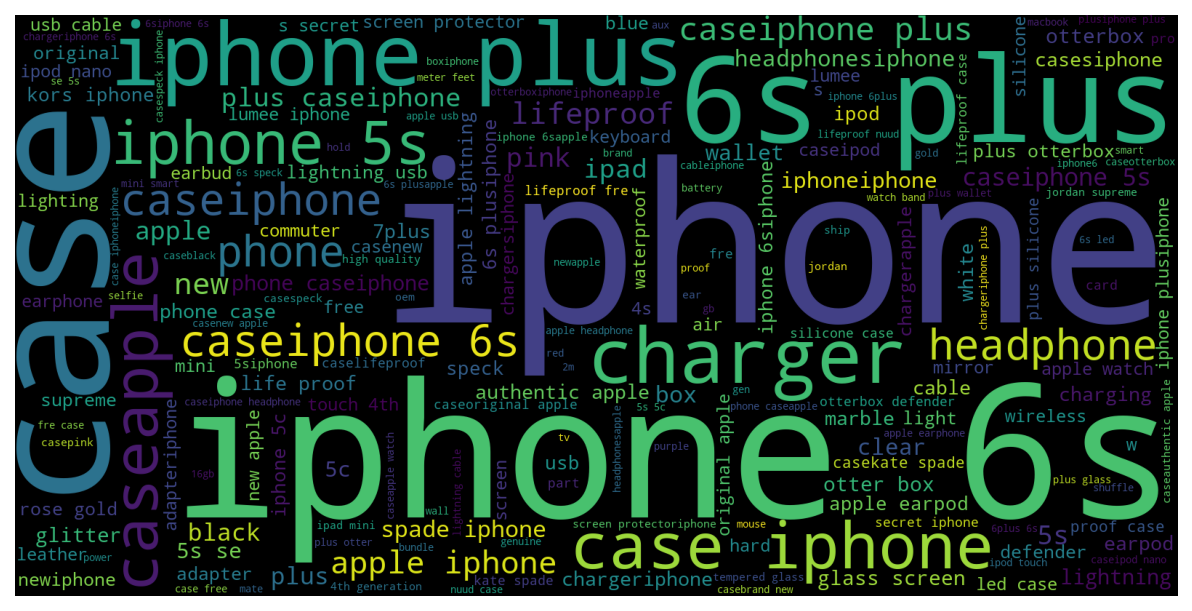

In [ ]:
apple_2 = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==2)]['name'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_2)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

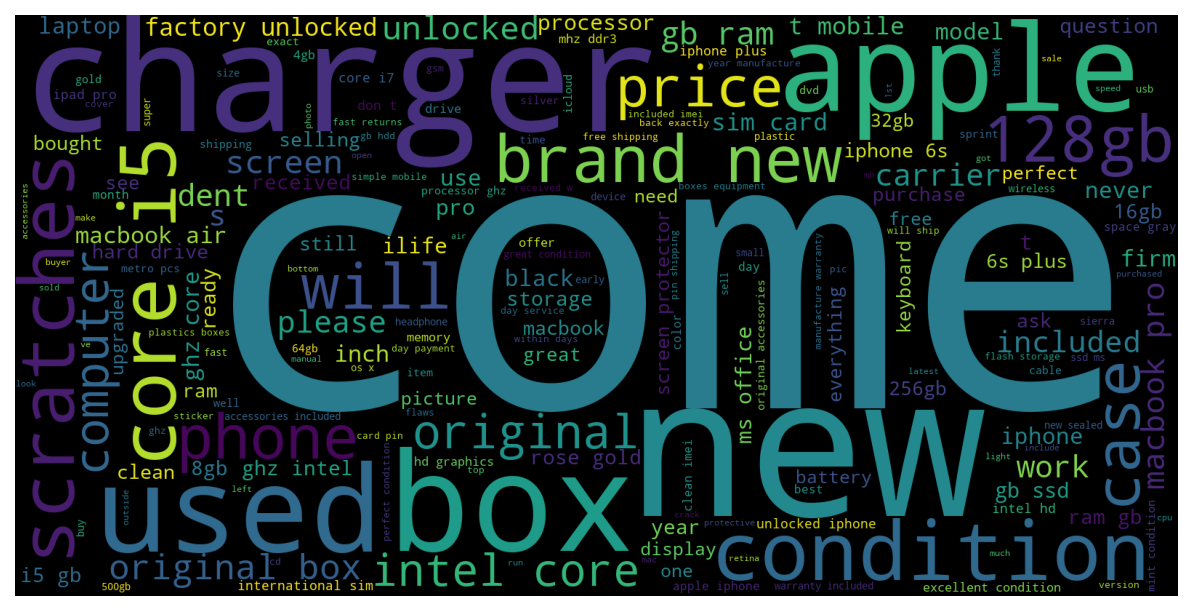

In [ ]:
apple_2_des = ''.join(s for s in mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']==2)]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(apple_2_des)

fig, ax = plt.subplots(figsize=(10,6),dpi=150)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);